In [1]:
#!pip install pandas numpy seaborn matplotlib klib dtale scikit-learn joblib pandas-profiling

In [49]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [50]:
df_train= pd.read_csv(r'C:\Python3\Scripts\TessLane\model\Train.csv')
df_test= pd.read_csv(r'C:\Python3\Scripts\TessLane\model\Test.csv')

In [51]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Type,Outlet_Establishment_Year,Item_Sales
0,CR01,1000,Low,Cracker,195,V001,Medium,Micro Store - Main,2010,390
1,CR05,1000,Regular,Cracker,180,V001,Medium,Micro Store - Main,2010,1260
2,CR09,700,Regular,Cracker,140,V001,Medium,Micro Store - Main,2010,560
3,CR14,100,Regular,Cracker,53,V001,Medium,Micro Store - Main,2010,636
4,CR15,25,Regular,Cracker,7,S003,Small,Micro Store C,2016,42


In [52]:
#df_test

In [53]:
df_train.shape

(4757, 10)

In [54]:
df_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Size                  0
Outlet_Type                  0
Outlet_Establishment_Year    0
Item_Sales                   0
dtype: int64

In [55]:
df_test.isnull().sum()

Item_Identifier      0
Item_Weight          0
Item_Fat_Content     0
Item_Type            0
Item_MRP             0
Outlet_Identifier    0
Outlet_Size          0
Outlet_Type          0
Outlet_Year          0
Outlet_Location      0
dtype: int64

In [56]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4757 entries, 0 to 4756
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Item_Identifier            4757 non-null   object
 1   Item_Weight                4757 non-null   int64 
 2   Item_Fat_Content           4757 non-null   object
 3   Item_Type                  4757 non-null   object
 4   Item_MRP                   4757 non-null   int64 
 5   Outlet_Identifier          4757 non-null   object
 6   Outlet_Size                4757 non-null   object
 7   Outlet_Type                4757 non-null   object
 8   Outlet_Establishment_Year  4757 non-null   int64 
 9   Item_Sales                 4757 non-null   int64 
dtypes: int64(4), object(6)
memory usage: 371.8+ KB


In [57]:
df_train.describe()

,Item_Weight,Item_MRP,Outlet_Establishment_Year,Item_Sales
count,4757.000000,4757.000000,4757.000000,4757.000000
mean,521.508304,115.109313,2013.144419,4113.531217
std,477.453042,84.799939,2.667193,5435.734735
min,20.000000,5.000000,2010.000000,0.000000
25%,150.000000,53.000000,2010.000000,672.000000
50%,500.000000,98.000000,2014.000000,2160.000000
75%,500.000000,145.000000,2016.000000,5415.000000
max,2000.000000,310.000000,2016.000000,35340.000000


### Item_Weight is numerical column so we fill it with Mean Imputation

In [58]:
df_train['Item_Weight'].describe()

count    4757.000000
mean      521.508304
std       477.453042
min        20.000000
25%       150.000000
50%       500.000000
75%       500.000000
max      2000.000000
Name: Item_Weight, dtype: float64

In [59]:
df_train['Item_Weight'].fillna(df_train['Item_Weight'].mean(),inplace=True)
df_test['Item_Weight'].fillna(df_test['Item_Weight'].mean(),inplace=True)

In [60]:
df_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Size                  0
Outlet_Type                  0
Outlet_Establishment_Year    0
Item_Sales                   0
dtype: int64

In [61]:
df_train['Item_Weight'].describe()

count    4757.000000
mean      521.508304
std       477.453042
min        20.000000
25%       150.000000
50%       500.000000
75%       500.000000
max      2000.000000
Name: Item_Weight, dtype: float64

### Outlet_Size is catagorical column so we fill it with Mode Imputation

In [62]:
df_train['Outlet_Size'].value_counts()

Small     2863
Medium    1894
Name: Outlet_Size, dtype: int64

In [63]:
df_train['Outlet_Size'].mode()

0    Small
Name: Outlet_Size, dtype: object

In [64]:
df_train['Outlet_Size'].fillna(df_train['Outlet_Size'].mode()[0],inplace=True)
df_test['Outlet_Size'].fillna(df_test['Outlet_Size'].mode()[0],inplace=True)

In [65]:
df_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Size                  0
Outlet_Type                  0
Outlet_Establishment_Year    0
Item_Sales                   0
dtype: int64

In [66]:
df_test.isnull().sum()

Item_Identifier      0
Item_Weight          0
Item_Fat_Content     0
Item_Type            0
Item_MRP             0
Outlet_Identifier    0
Outlet_Size          0
Outlet_Type          0
Outlet_Year          0
Outlet_Location      0
dtype: int64

# Selecting features based on general requirements

In [67]:
df_train.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)
df_test.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

In [68]:
df_train

,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Size,Outlet_Type,Outlet_Establishment_Year,Item_Sales
0,1000,Low,Cracker,195,Medium,Micro Store - Main,2010,390
1,1000,Regular,Cracker,180,Medium,Micro Store - Main,2010,1260
2,700,Regular,Cracker,140,Medium,Micro Store - Main,2010,560
3,100,Regular,Cracker,53,Medium,Micro Store - Main,2010,636
4,25,Regular,Cracker,7,Small,Micro Store C,2016,42
...,...,...,...,...,...,...,...,...
4752,500,High,Nuts,75,Small,Micro Store C,2016,5400
4753,600,Low,Bread,125,Small,Micro Store C,2016,8875
4754,2000,High,Biscuit,310,Small,Micro Store C,2016,14570
4755,2000,High,Biscuit,310,Small,Micro Store C,2016,26350


## Exploratory Data Analysis

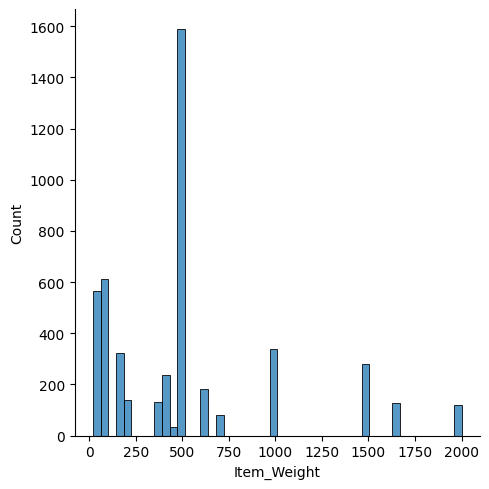

In [69]:
sns.displot(df_train['Item_Weight'])
plt.savefig("C:\Python3\Scripts\TessLane\static\pics\ItemWeight.jpg")

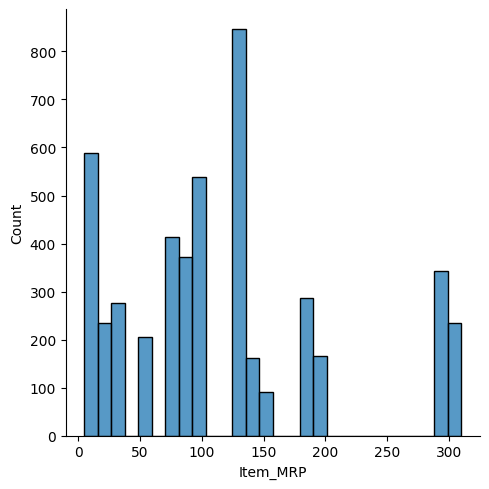

In [70]:
sns.displot(df_train['Item_MRP'])
plt.savefig("C:\Python3\Scripts\TessLane\static\pics\ItemMRP.jpg")

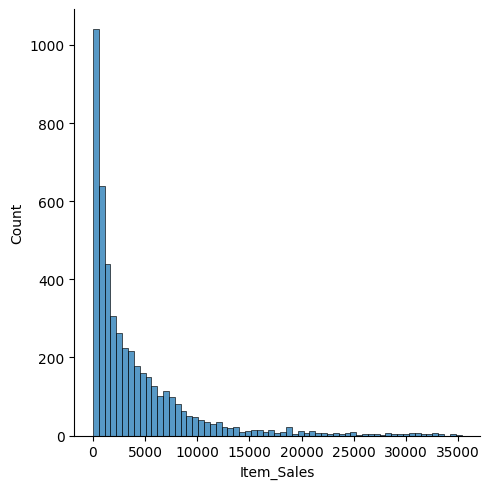

In [71]:
sns.displot(df_train['Item_Sales'])
plt.savefig("C:\Python3\Scripts\TessLane\static\pics\ItemSales.jpg")

### Explore Numerical Columns

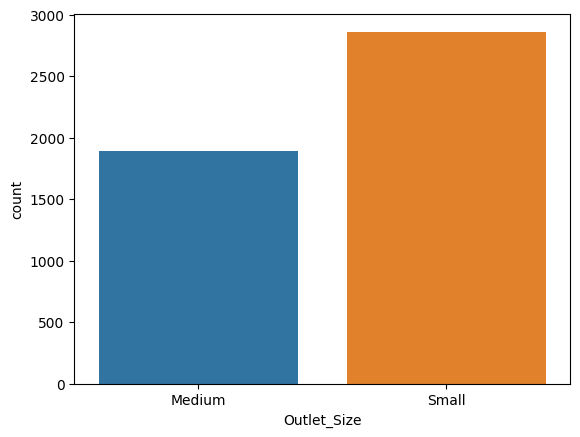

In [72]:
sns.countplot(df_train['Outlet_Size'])
plt.savefig("C:\Python3\Scripts\TessLane\static\pics\OutletSize.jpg")

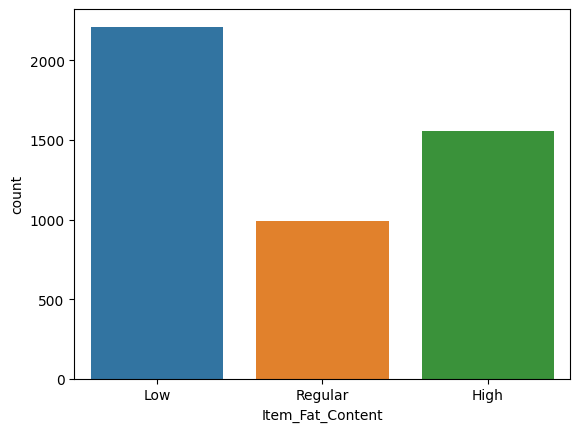

In [73]:
sns.countplot(df_train["Item_Fat_Content"])
plt.savefig("C:\Python3\Scripts\TessLane\static\pics\IFC.jpg")

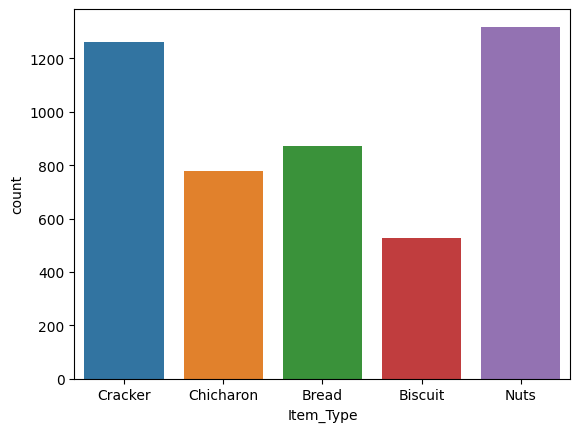

In [74]:
sns.countplot(df_train["Item_Type"])
plt.savefig("C:\Python3\Scripts\TessLane\static\pics\ItemType.jpg")

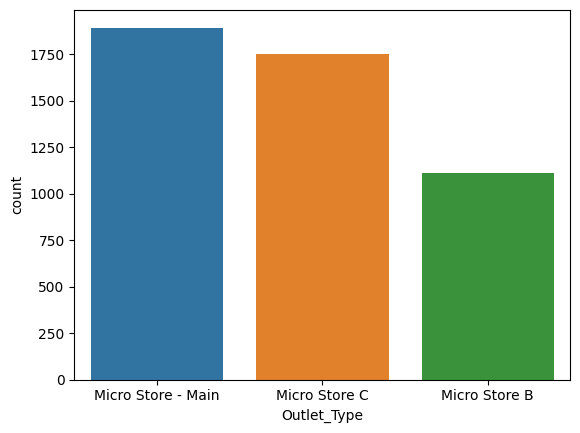

In [75]:
sns.countplot(df_train['Outlet_Type'])
plt.savefig("C:\Python3\Scripts\TessLane\static\pics\OutletType.jpg")

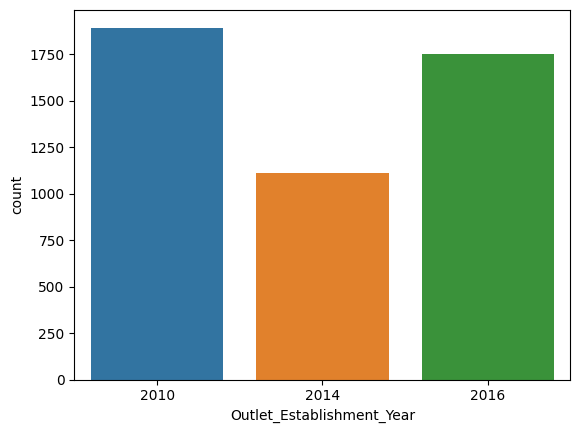

In [76]:
sns.countplot(df_train['Outlet_Establishment_Year'])
plt.savefig("C:\Python3\Scripts\TessLane\static\pics\OutletYear.jpg")

# EDA with Dtale Library

In [77]:
import dtale

In [78]:
dtale.show(df_train)

# EDA using Klib Library

In [79]:
import klib

GridSpec(6, 4)

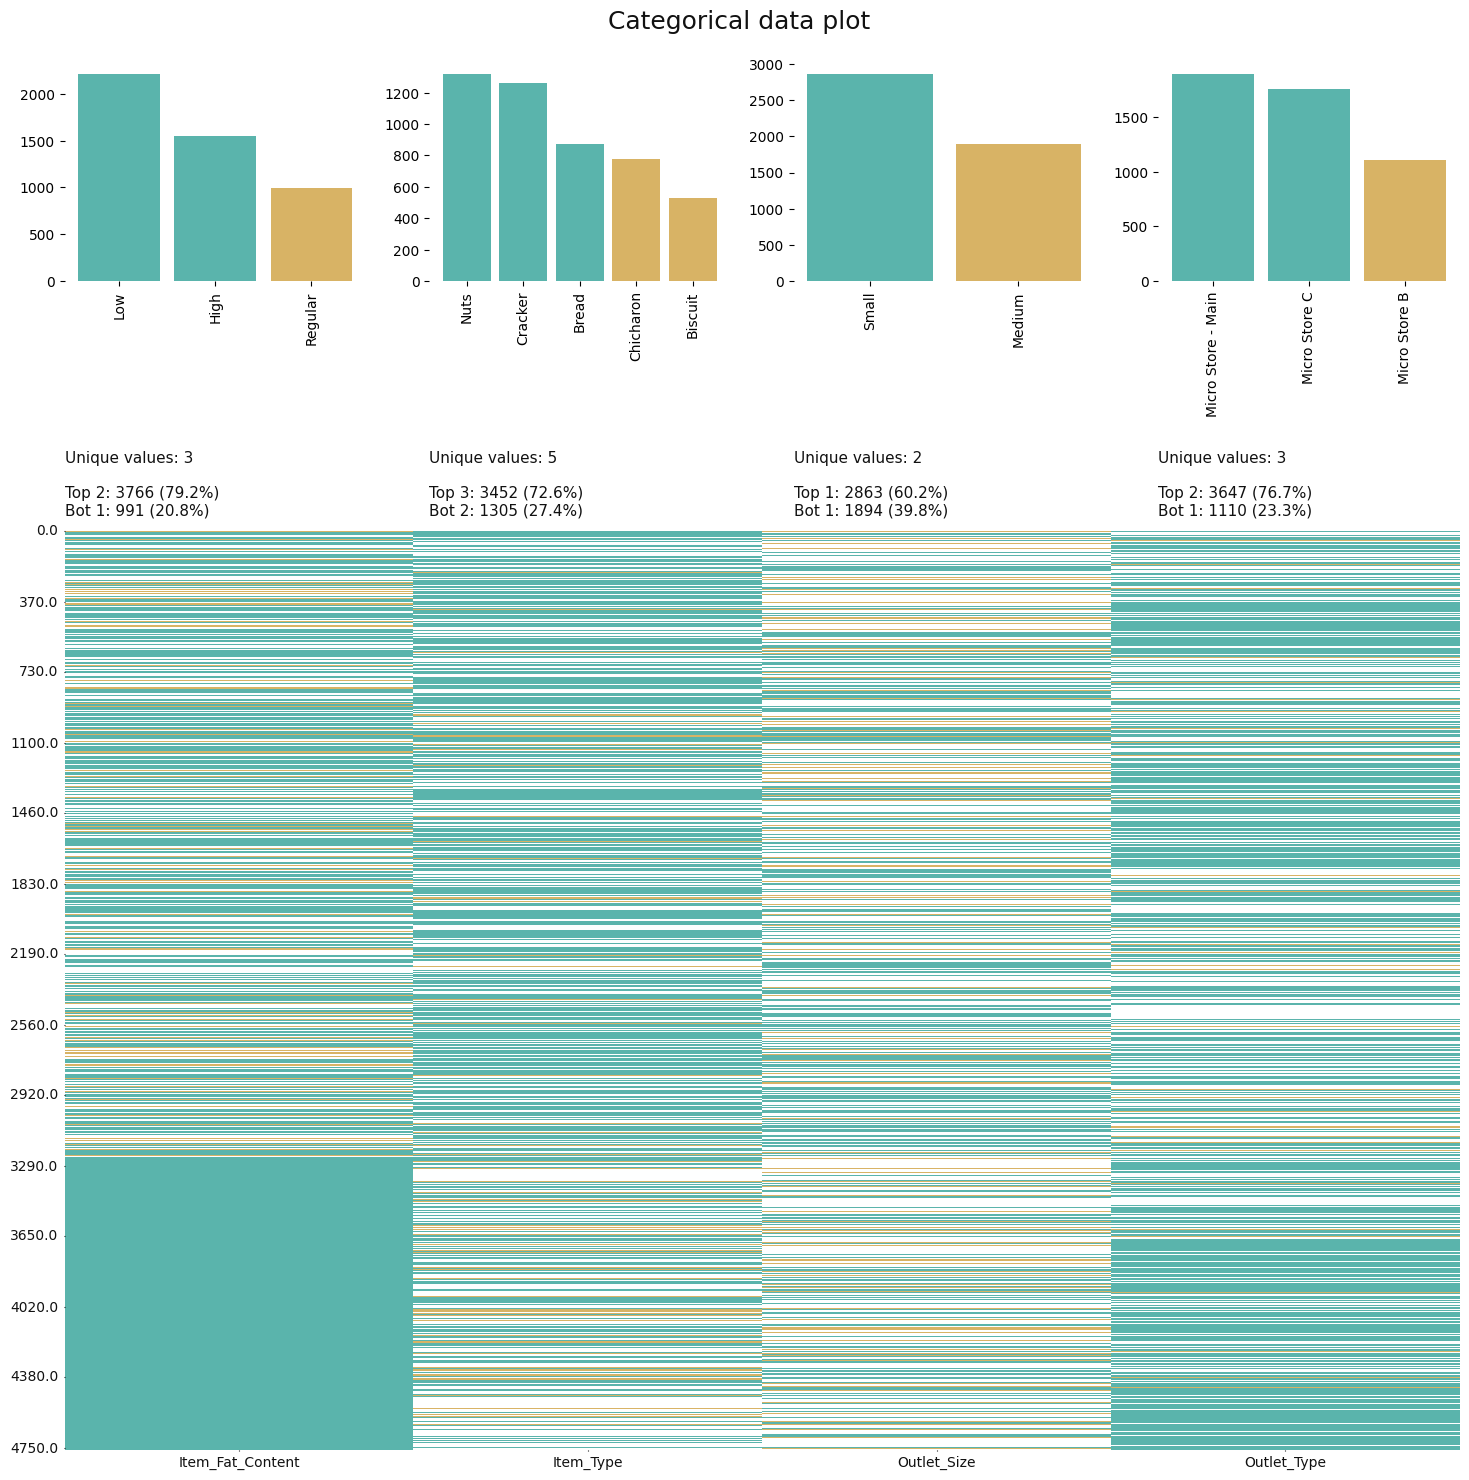

In [80]:
# klib.describe - functions for visualizing datasets
klib.cat_plot(df_train) # returns a visualization of the number and frequency of categorical features


In [81]:
klib.corr_mat(df_train) # returns a color-encoded correlation matrix


,Item_Weight,Item_MRP,Outlet_Establishment_Year,Item_Sales
Item_Weight,1.00,0.85,0.01,0.60
Item_MRP,0.85,1.00,0.03,0.62
Outlet_Establishment_Year,0.01,0.03,1.00,-0.01
Item_Sales,0.60,0.62,-0.01,1.00


<AxesSubplot: title={'center': 'Feature-correlation (pearson)'}>

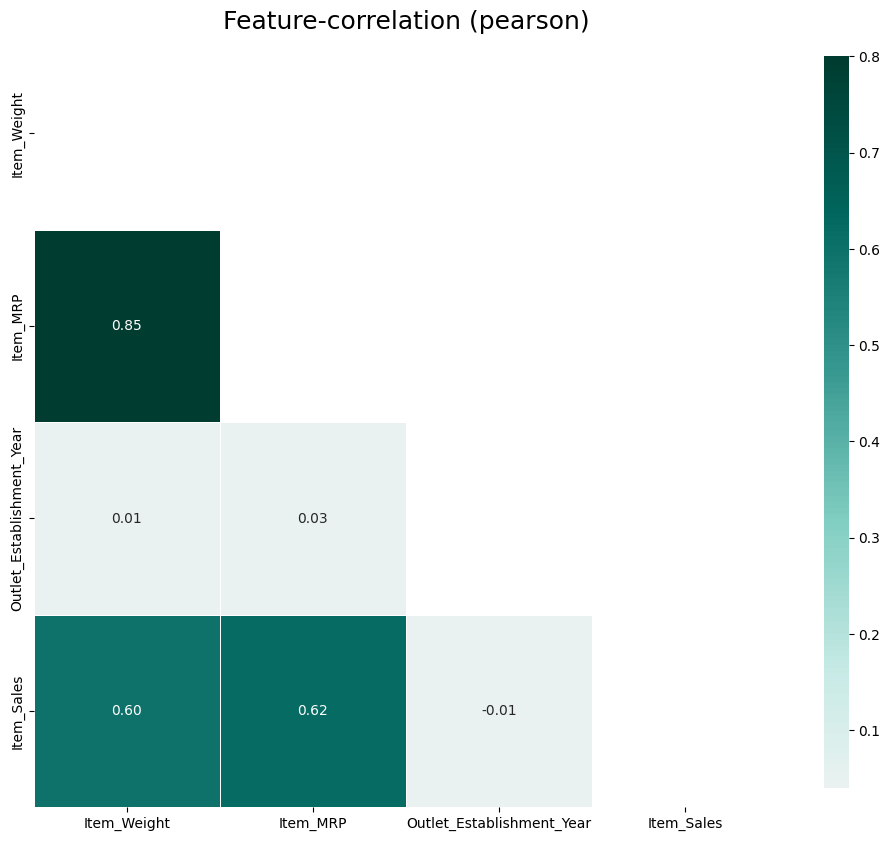

In [82]:
klib.corr_plot(df_train) # returns a color-encoded heatmap, ideal for correlations


<AxesSubplot: xlabel='Item_Sales', ylabel='Density'>

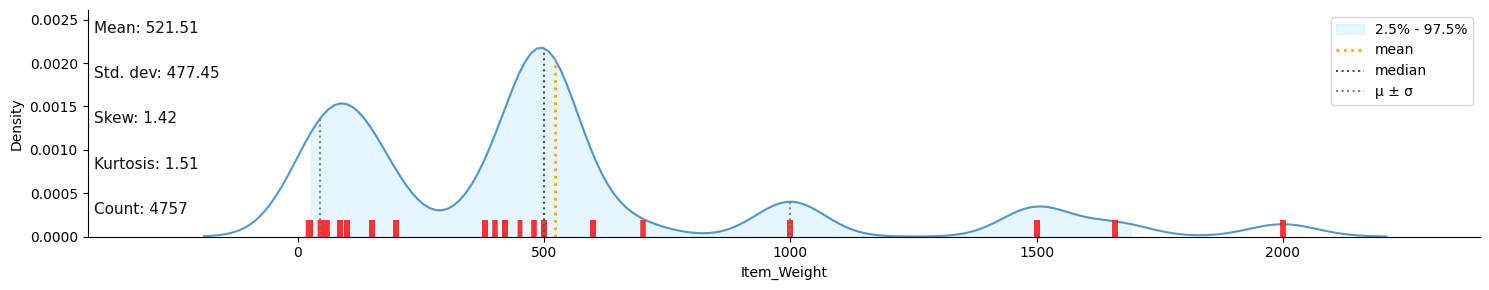

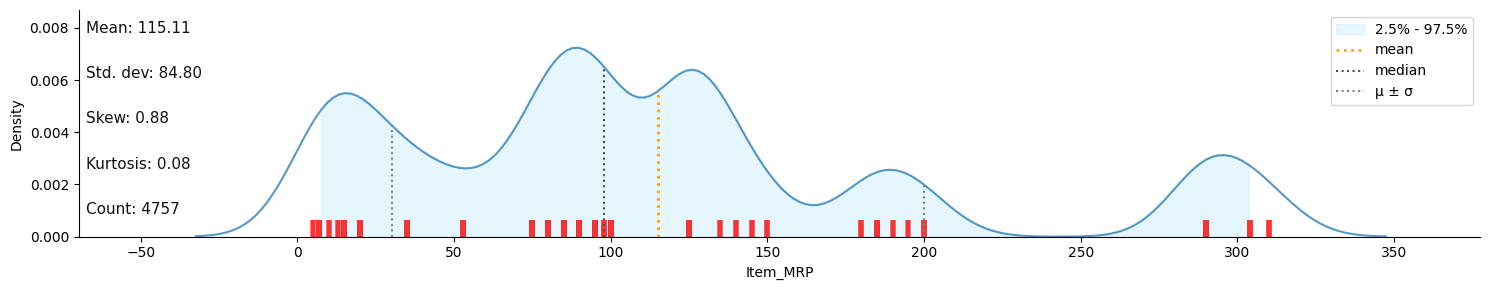

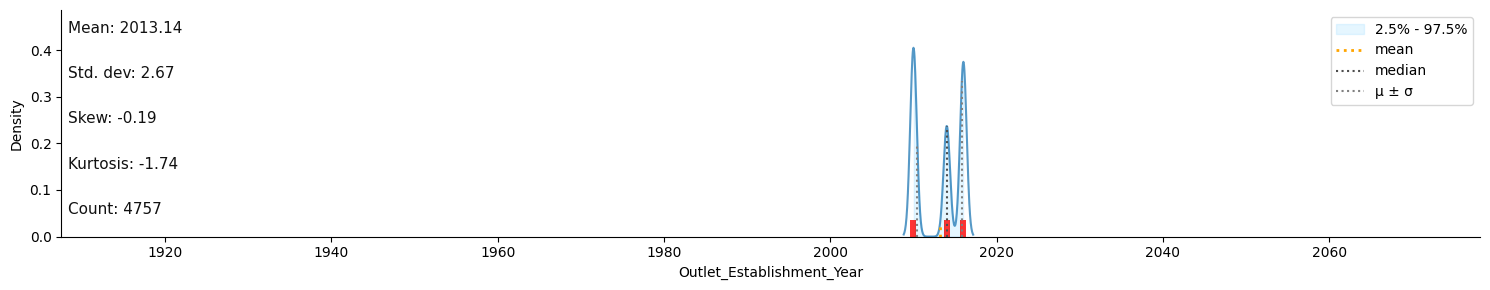

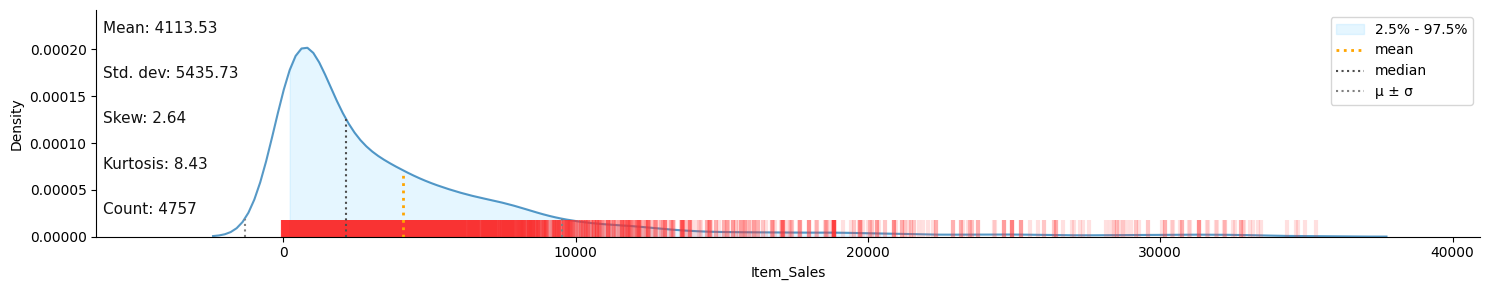

In [83]:
klib.dist_plot(df_train) # returns a distribution plot for every numeric feature

In [84]:
klib.missingval_plot(df_train) # returns a figure containing information about missing values

No missing values found in the dataset.


# Data Cleaning using Klib Library

In [85]:
# klib.clean - functions for cleaning datasets
klib.data_cleaning(df_train) # performs datacleaning (drop duplicates & empty rows/cols, adjust dtypes,...)


Shape of cleaned data: (4368, 8) - Remaining NAs: 0


Dropped rows: 389
     of which 389 duplicates. (Rows (first 150 shown): [193, 407, 437, 480, 492, 577, 618, 634, 644, 790, 819, 827, 829, 839, 849, 866, 900, 938, 980, 1001, 1003, 1006, 1008, 1022, 1026, 1036, 1052, 1087, 1088, 1091, 1102, 1103, 1124, 1126, 1129, 1132, 1163, 1231, 1254, 1266, 1513, 1799, 1803, 1835, 1871, 1883, 2026, 2116, 2143, 2144, 2147, 2166, 2175, 2217, 2223, 2285, 2294, 2378, 2385, 2413, 2437, 2477, 2495, 2502, 2545, 2563, 2688, 2697, 2699, 2707, 2758, 2787, 2804, 2856, 2878, 2880, 2894, 2895, 2897, 2911, 2921, 2923, 2926, 2927, 2929, 2934, 2935, 2960, 2971, 2979, 2988, 3025, 3031, 3035, 3037, 3042, 3066, 3073, 3100, 3105, 3118, 3120, 3121, 3125, 3134, 3136, 3137, 3144, 3148, 3149, 3154, 3156, 3162, 3175, 3177, 3208, 3213, 3214, 3224, 3233, 3245, 3247, 3255, 3269, 3327, 3345, 3348, 3379, 3398, 3404, 3410, 3414, 3415, 3416, 3440, 3444, 3458, 3527, 3535, 3541, 3548, 3550, 3558, 3570, 3581, 3584, 3594, 3596, 361

,item_weight,item_fat_content,item_type,item_mrp,outlet_size,outlet_type,outlet_establishment_year,item_sales
0,1000,Low,Cracker,195,Medium,Micro Store - Main,2010,390
1,1000,Regular,Cracker,180,Medium,Micro Store - Main,2010,1260
2,700,Regular,Cracker,140,Medium,Micro Store - Main,2010,560
3,100,Regular,Cracker,53,Medium,Micro Store - Main,2010,636
4,25,Regular,Cracker,7,Small,Micro Store C,2016,42
...,...,...,...,...,...,...,...,...
4363,1660,High,Biscuit,304,Medium,Micro Store - Main,2010,18240
4364,500,High,Nuts,95,Medium,Micro Store - Main,2010,3610
4365,2000,High,Biscuit,310,Small,Micro Store C,2016,14570
4366,2000,High,Biscuit,310,Small,Micro Store C,2016,26350


In [86]:
klib.clean_column_names(df_train) # cleans and standardizes column names, also called inside data_cleaning()


,item_weight,item_fat_content,item_type,item_mrp,outlet_size,outlet_type,outlet_establishment_year,item_sales
0,1000,Low,Cracker,195,Medium,Micro Store - Main,2010,390
1,1000,Regular,Cracker,180,Medium,Micro Store - Main,2010,1260
2,700,Regular,Cracker,140,Medium,Micro Store - Main,2010,560
3,100,Regular,Cracker,53,Medium,Micro Store - Main,2010,636
4,25,Regular,Cracker,7,Small,Micro Store C,2016,42
...,...,...,...,...,...,...,...,...
4752,500,High,Nuts,75,Small,Micro Store C,2016,5400
4753,600,Low,Bread,125,Small,Micro Store C,2016,8875
4754,2000,High,Biscuit,310,Small,Micro Store C,2016,14570
4755,2000,High,Biscuit,310,Small,Micro Store C,2016,26350


In [87]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4757 entries, 0 to 4756
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   item_weight                4757 non-null   int64 
 1   item_fat_content           4757 non-null   object
 2   item_type                  4757 non-null   object
 3   item_mrp                   4757 non-null   int64 
 4   outlet_size                4757 non-null   object
 5   outlet_type                4757 non-null   object
 6   outlet_establishment_year  4757 non-null   int64 
 7   item_sales                 4757 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 297.4+ KB


In [88]:
df_train=klib.convert_datatypes(df_train) # converts existing to more efficient dtypes, also called inside data_cleaning()
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4757 entries, 0 to 4756
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   item_weight                4757 non-null   int16   
 1   item_fat_content           4757 non-null   category
 2   item_type                  4757 non-null   category
 3   item_mrp                   4757 non-null   int16   
 4   outlet_size                4757 non-null   category
 5   outlet_type                4757 non-null   category
 6   outlet_establishment_year  4757 non-null   int16   
 7   item_sales                 4757 non-null   int32   
dtypes: category(4), int16(3), int32(1)
memory usage: 65.7 KB


In [89]:
klib.mv_col_handling(df_train)

,item_weight,item_fat_content,item_type,item_mrp,outlet_size,outlet_type,outlet_establishment_year,item_sales
0,1000,Low,Cracker,195,Medium,Micro Store - Main,2010,390
1,1000,Regular,Cracker,180,Medium,Micro Store - Main,2010,1260
2,700,Regular,Cracker,140,Medium,Micro Store - Main,2010,560
3,100,Regular,Cracker,53,Medium,Micro Store - Main,2010,636
4,25,Regular,Cracker,7,Small,Micro Store C,2016,42
...,...,...,...,...,...,...,...,...
4752,500,High,Nuts,75,Small,Micro Store C,2016,5400
4753,600,Low,Bread,125,Small,Micro Store C,2016,8875
4754,2000,High,Biscuit,310,Small,Micro Store C,2016,14570
4755,2000,High,Biscuit,310,Small,Micro Store C,2016,26350


# Preprocessing Task before Model Building

## 1) Label Encoding

In [90]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [91]:
df_train['item_fat_content']= le.fit_transform(df_train['item_fat_content'])
df_train['item_type']= le.fit_transform(df_train['item_type'])
df_train['outlet_size']= le.fit_transform(df_train['outlet_size'])
df_train['outlet_type']= le.fit_transform(df_train['outlet_type'])
df_train['outlet_establishment_year']= le.fit_transform(df_train['outlet_establishment_year'])

In [92]:
df_train

,item_weight,item_fat_content,item_type,item_mrp,outlet_size,outlet_type,outlet_establishment_year,item_sales
0,1000,1,3,195,0,0,0,390
1,1000,2,3,180,0,0,0,1260
2,700,2,3,140,0,0,0,560
3,100,2,3,53,0,0,0,636
4,25,2,3,7,1,2,2,42
...,...,...,...,...,...,...,...,...
4752,500,0,4,75,1,2,2,5400
4753,600,1,1,125,1,2,2,8875
4754,2000,0,0,310,1,2,2,14570
4755,2000,0,0,310,1,2,2,26350


# 2) Splitting our data into train and test

In [93]:
X=df_train.drop('item_sales',axis=1)

In [94]:
Y=df_train['item_sales']

In [95]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state=101, test_size=0.2)

# 3) Standarization 

In [96]:
X.describe()

,item_weight,item_fat_content,item_type,item_mrp,outlet_size,outlet_type,outlet_establishment_year
count,4757.000000,4757.000000,4757.000000,4757.000000,4757.000000,4757.000000,4757.000000
mean,521.508304,0.881648,2.415598,115.109313,0.601850,0.970359,0.970359
std,477.453042,0.721875,1.351833,84.799939,0.489568,0.875181,0.875181
min,20.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000
25%,150.000000,0.000000,1.000000,53.000000,0.000000,0.000000,0.000000
50%,500.000000,1.000000,3.000000,98.000000,1.000000,1.000000,1.000000
75%,500.000000,1.000000,4.000000,145.000000,1.000000,2.000000,2.000000
max,2000.000000,2.000000,4.000000,310.000000,1.000000,2.000000,2.000000


In [97]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()

In [98]:
X_train_std= sc.fit_transform(X_train)

In [99]:
X_test_std= sc.transform(X_test)

In [100]:
X_train_std

array([[-0.92298781,  1.55310532,  0.42999364, ..., -1.24030597,
        -1.11693409, -1.11693409],
       [ 2.05932071,  0.16457954, -1.77800339, ..., -1.24030597,
        -1.11693409, -1.11693409],
       [-0.04831782,  0.16457954, -1.04200438, ...,  0.80625267,
         0.02798353,  0.02798353],
       ...,
       [-0.04831782,  0.16457954,  1.16599265, ..., -1.24030597,
        -1.11693409, -1.11693409],
       [-0.30123445,  0.16457954, -1.04200438, ...,  0.80625267,
         1.17290115,  1.17290115],
       [-0.04831782,  0.16457954,  1.16599265, ..., -1.24030597,
        -1.11693409, -1.11693409]])

In [101]:
X_test_std

array([[-0.04831782,  0.16457954,  1.16599265, ...,  0.80625267,
         1.17290115,  1.17290115],
       [-0.99675516, -1.22394625, -0.30600537, ..., -1.24030597,
        -1.11693409, -1.11693409],
       [-0.30123445,  0.16457954, -1.04200438, ...,  0.80625267,
         0.02798353,  0.02798353],
       ...,
       [-0.04831782,  0.16457954,  1.16599265, ...,  0.80625267,
         1.17290115,  1.17290115],
       [-0.04831782, -1.22394625,  1.16599265, ..., -1.24030597,
        -1.11693409, -1.11693409],
       [-0.04831782,  0.16457954,  1.16599265, ...,  0.80625267,
         1.17290115,  1.17290115]])

In [102]:
Y_train

1089     140
1952    7250
36       875
2213    3750
4127    2275
        ... 
4079    4500
4171    2180
599      600
1361    2875
1547    3300
Name: item_sales, Length: 3805, dtype: int32

In [103]:
Y_test

2517    9600
358      160
2613    5250
3418    1360
4199    3850
        ... 
3960    1760
0        390
2716    8120
4188    6750
2858     200
Name: item_sales, Length: 952, dtype: int32

In [104]:
import joblib

# Model Building

## XGBoost Regressor

In [105]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [106]:
from xgboost import XGBRegressor

In [107]:
model = XGBRegressor()

In [108]:
model.fit(X_train_std,Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [109]:
# prediction on training data
Y_pred_xg=model.predict(X_test_std)

In [110]:
# R squared Value
print('R Squared value = ',r2_score(Y_test,Y_pred_xg))

R Squared value =  0.5389057907930148


In [111]:
# prediction on test data
Y_pred = model.predict(X_test)

In [112]:
# R squared Value
r2_test = metrics.r2_score(Y_test, Y_pred)

In [113]:
print('R Squared value = ', r2_score(Y_test ,Y_pred))

R Squared value =  -0.29513222202856326


## Linear Regression

In [114]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()

In [115]:
lr.fit(X_train_std,Y_train)

LinearRegression()

In [116]:
X_test.head()

,item_weight,item_fat_content,item_type,item_mrp,outlet_size,outlet_type,outlet_establishment_year
2517,500,1,4,200,1,2,2
358,50,0,2,20,0,0,0
2613,380,1,1,125,1,1,1
3418,60,1,1,20,1,1,1
4199,100,0,2,35,1,2,2


In [117]:
Y_pred_lr=lr.predict(X_test_std)

In [118]:
print('R Squared value = ', r2_score(Y_test,Y_pred_lr))

R Squared value =  0.493862500292387


## Random Forest Regressor

In [119]:
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor(n_estimators=1000)

In [120]:
rf.fit(X_train_std,Y_train)

RandomForestRegressor(n_estimators=1000)

In [121]:
Y_pred_rf= rf.predict(X_test_std)

In [122]:
print('R Squared value = ', r2_score(Y_test,Y_pred_rf))

R Squared value =  0.5398862442195742


# Save your model

In [123]:
import joblib

In [124]:
# standard scaler
joblib.dump(sc,r'C:\Python3\Scripts\TessLane\model\sc.sav')

['C:\\Python3\\Scripts\\TessLane\\model\\sc.sav']

In [125]:
# xgboost regressor
joblib.dump(model,r'C:\Python3\Scripts\TessLane\model\xg.sav')

['C:\\Python3\\Scripts\\TessLane\\model\\xg.sav']